## Project 1- Unsupervised Learning- Car Mpg

# Importing all the necessary libraries

In [27]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

Importing the Dataset

In [2]:
df=pd.read_csv('cars-dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


#### Exploratory Data Analysis

We can see from the above that other than 'car name' there is only one column which has object datatype. So analysing that particular column and converting it as necessary.

In [3]:
df.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


Converting Non-numeric values to Numeric values

In [4]:
df['hp'] = pd.to_numeric(df['hp'], errors='coerce')

In [6]:
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


Now we can see that only Car name is of object datatype and 'hp' is converted into float

In [7]:
print(df.isna().any())

car name    False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
mpg         False
dtype: bool


We can see there are some missing values in the 'hp' column so we have to replace the values. For this problem i am using KNN to fill the NAN values

In [8]:
df1=df[df.isnull().any(axis=1)].drop(['car name'],axis=1)
df2=df[df.columns[~df.columns.isin(['car name'])]].dropna()

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(df2.drop(['hp'],axis=1),df2['hp'])
Temp_df=pd.DataFrame(KNN.predict(df1.drop(['hp'],axis=1)),index=df1.index)

df['KNN_HP']=Temp_df

In [9]:
df["hp"]=df["hp"].replace(np.nan,df["KNN_HP"])
df=df.drop(['KNN_HP'],axis=1)

In [26]:
print(df.isna().any())

car name    False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
mpg         False
dtype: bool


Now there is no null values in the dataframe. Next is to convert the 'car name' into numerical values using appropriate methods.

In [11]:
TEMP_DF=pd.DataFrame(index=df.index)

for column in df:
    LE = LabelEncoder()    
    TEMP_DF[column] = LE.fit_transform(df[column])

It is best to scale the dataset as every column may be in different scale than the other.

In [14]:
df_scaled = TEMP_DF.apply(zscore)
df_scaled.head(5)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,-1.113745,1.359605,1.101377,0.796694,0.785013,-1.353101,-1.627426,-0.832753
1,-1.259185,1.359605,1.233476,1.569755,0.960593,-1.443893,-1.627426,-1.115330
2,0.922428,1.359605,1.145410,1.312068,0.726486,-1.670874,-1.627426,-0.832753
3,-1.505316,1.359605,1.013311,1.312068,0.716732,-1.353101,-1.627426,-1.058815
4,0.139285,1.359605,0.969278,1.097328,0.755750,-1.716270,-1.627426,-0.945784


#### Use pair plot or scatter matrix to visualize how the different variables are related

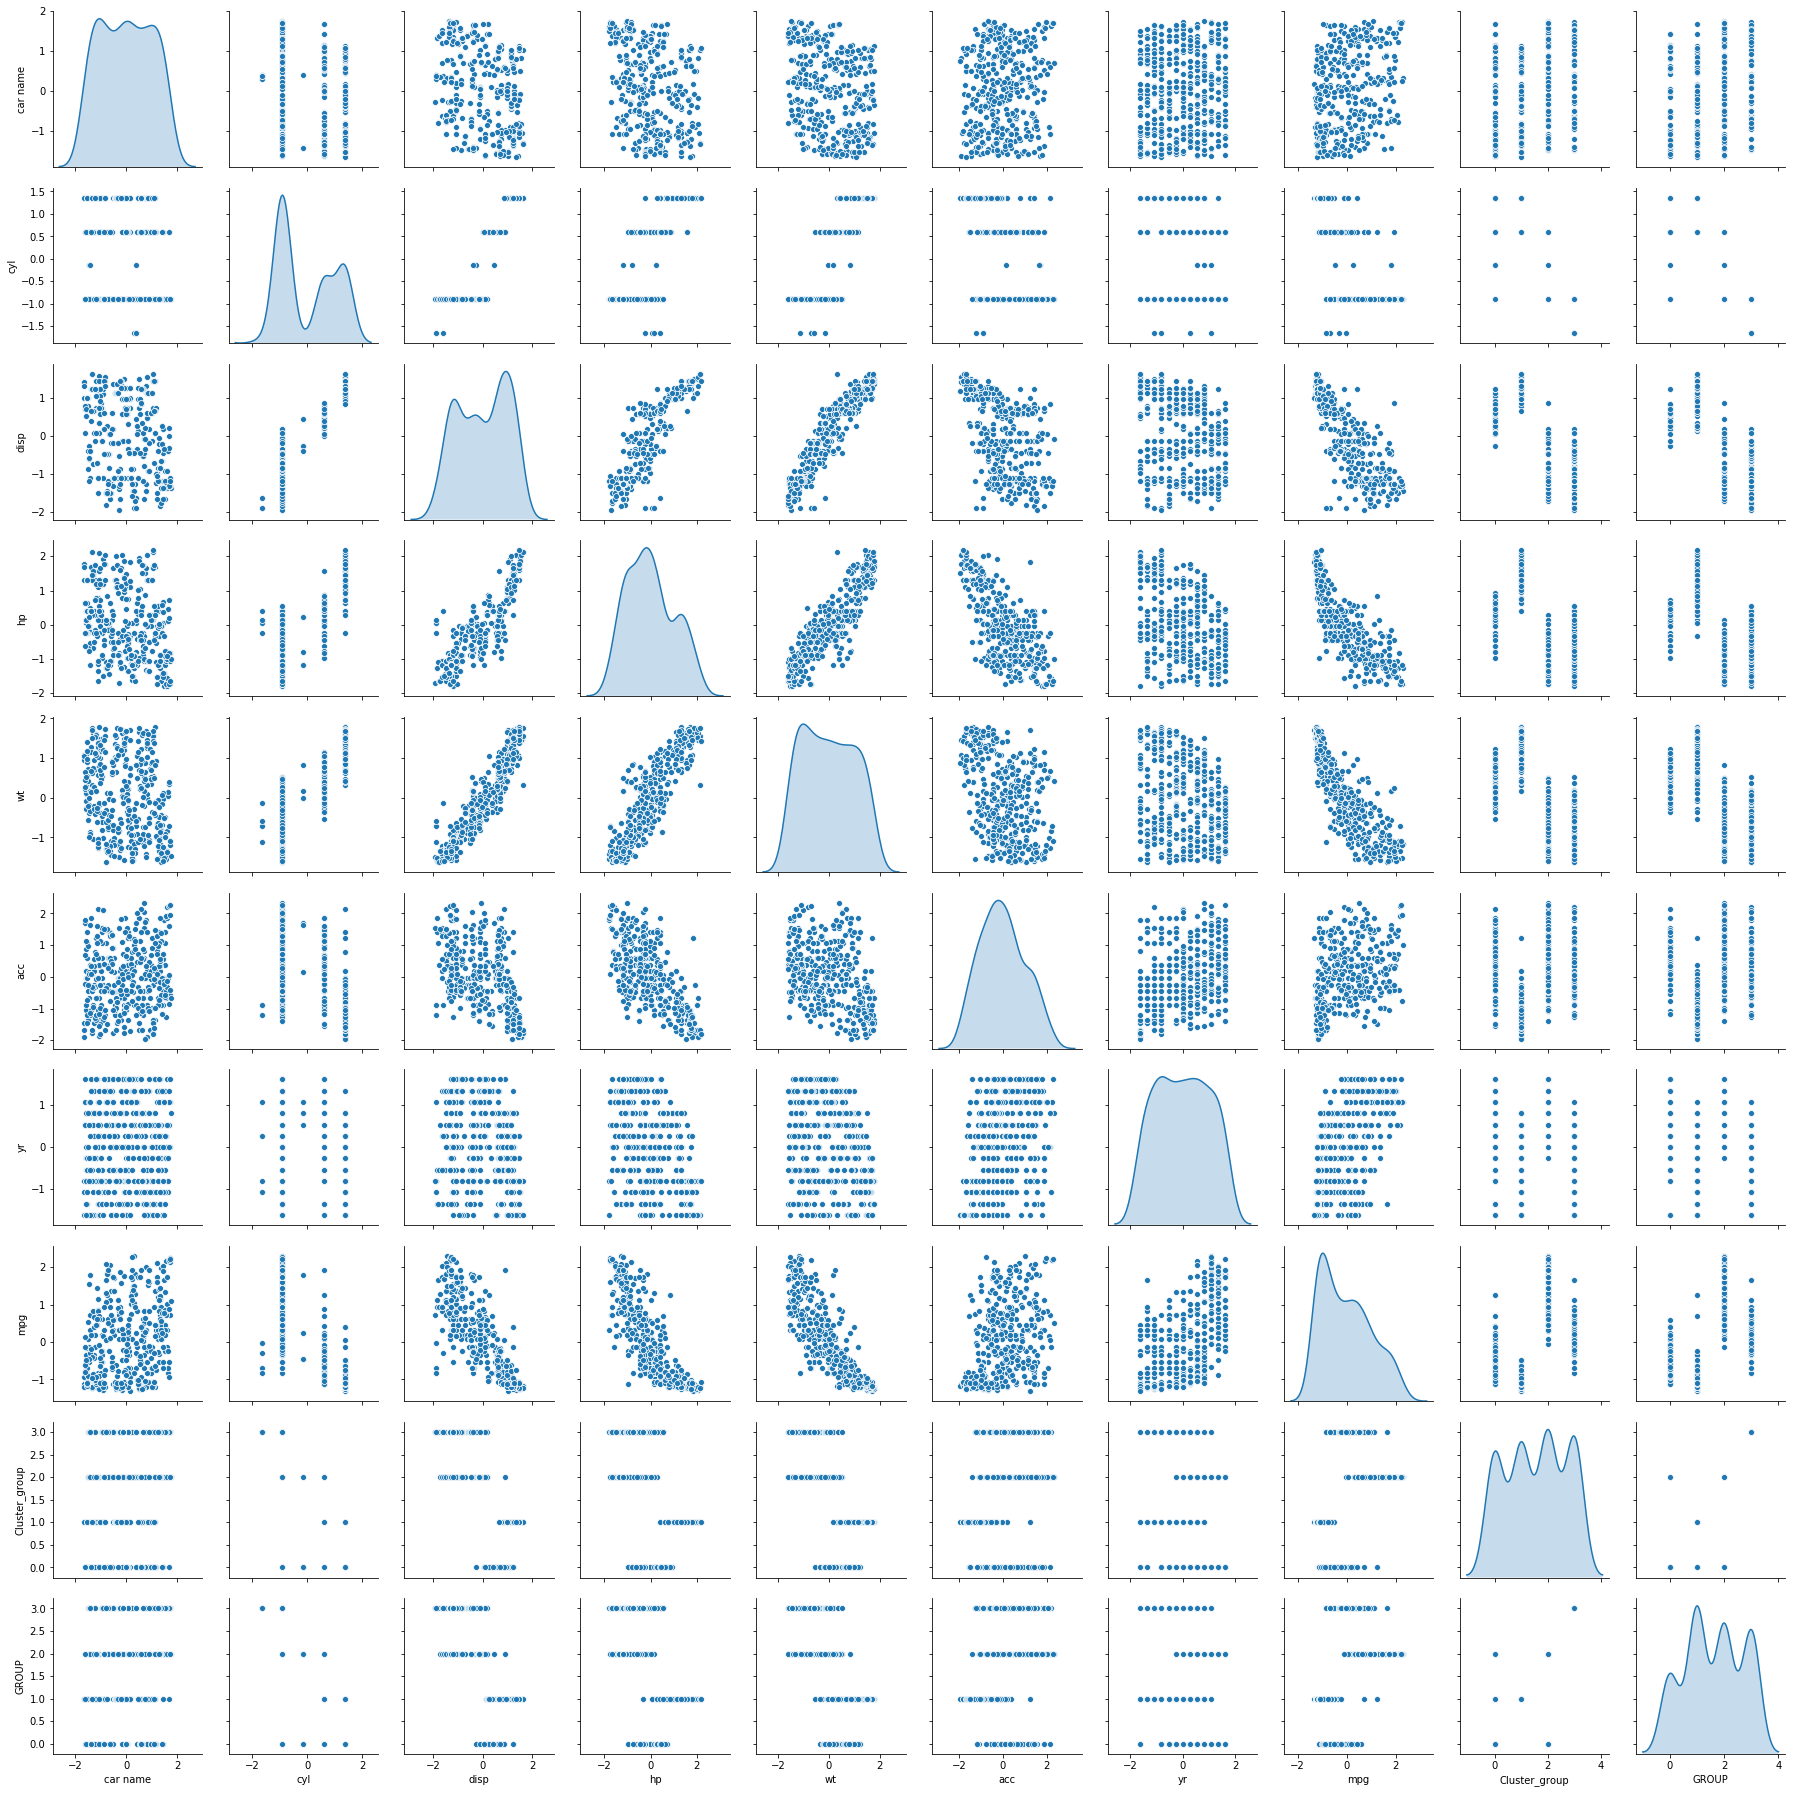

In [28]:
sns.pairplot(df_scaled,diag_kind="kde")

Inferences from pair plot: Cylinder feature suggest there could be 3 or 4 or more clusters in the dataset.

In [17]:
cluster_errors = []
cluster_sil_scores = []

cluster_range=range(2,10)

for Cluster in range(2,10):
  clusters = KMeans(Cluster)
  clusters.fit(df_scaled)
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1627.328123
1,3,1350.899601
2,4,1131.650100
3,5,1018.444053
4,6,939.313441
5,7,872.904014
6,8,817.747352
7,9,759.128838


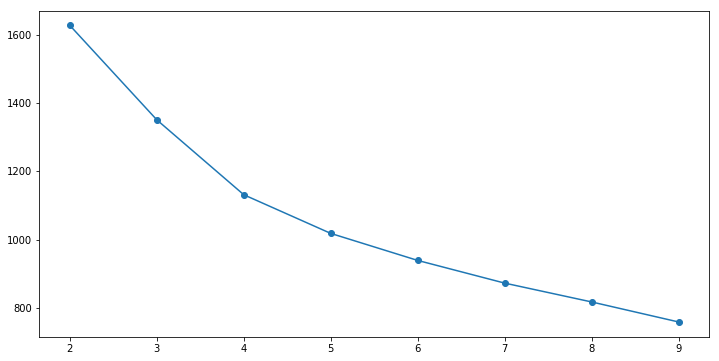

In [18]:
# Elbow plot
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Based on the above Elbow graph, a elbow is observed on cluster 4. Hence we consider the dataset has 4 clusters for now.

In [21]:
K_means = KMeans(n_clusters = 4, random_state = 1 )
K_means.fit(df_scaled)
Cluster_group = K_means.labels_ 
df_scaled['Cluster_group']=Cluster_group

In [22]:
centroids = K_means.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df=centroid_df.drop(['Cluster_group'],axis=1)
centroid_df
prediction=K_means.predict(df_scaled)
df_scaled["GROUP"] = prediction

Visualising using Box plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026FFBA20518>,
      dtype=object)

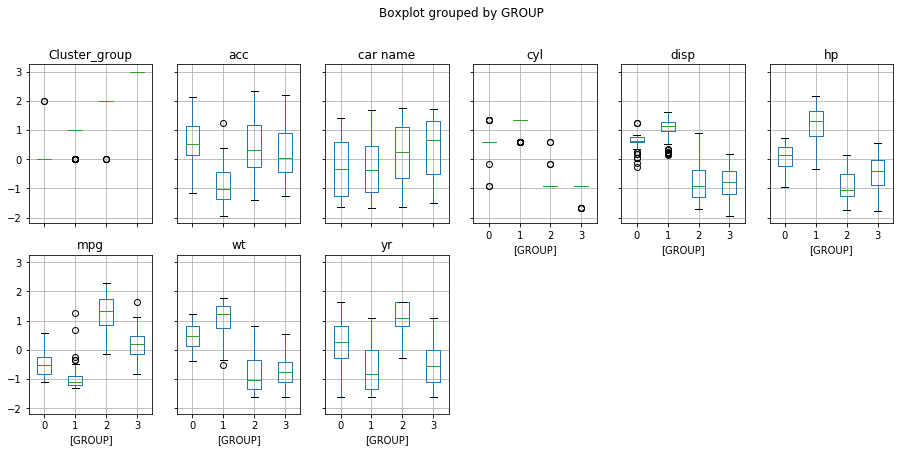

In [23]:
df_scaled.boxplot(by = 'GROUP',  layout=(3,6), figsize=(15, 10))

Based on the box plot, the dataset seems to have 4 clusters.

In [24]:
# Count of records (scenarios) based on the clusters
df_scaled.Cluster_group.value_counts()

2    106
3    103
1     97
0     92
Name: Cluster_group, dtype: int64

#### Use linear regression model on different clusters separately and print the coefficients of the models individually

In [25]:
I=0

for Cluster in [x for _, x in df_scaled.groupby(df_scaled['Cluster_group'])]:
    I=I+1
  
    X=Cluster.drop(['mpg','Cluster_group','GROUP'], axis=1)
    Y=Cluster['mpg']
    
    LR = linear_model.LinearRegression()
    LR.fit(X,Y)
    Score=LR.score(X, Y)
    print("\n")
    for idx,col_name in enumerate(X.columns):
        print("Coefficient for cluster {}, {} is {}".format(I,col_name, LR.coef_[idx]))
        
    print("The score for cluster {} model is {} ".format(I,Score))



Coefficient for cluster 1, car name is 0.0457027362865195
Coefficient for cluster 1, cyl is -0.11607489897849735
Coefficient for cluster 1, disp is 0.2689802942001626
Coefficient for cluster 1, hp is 0.05817500117143632
Coefficient for cluster 1, wt is -0.6084080731915346
Coefficient for cluster 1, acc is -0.03379585536365406
Coefficient for cluster 1, yr is 0.29014107623926216
The score for cluster 1 model is 0.48741224644522274 


Coefficient for cluster 2, car name is 0.0048754518541394955
Coefficient for cluster 2, cyl is -0.07049268913152938
Coefficient for cluster 2, disp is -0.09832801321930265
Coefficient for cluster 2, hp is -0.058569539926532146
Coefficient for cluster 2, wt is -0.14739895693773503
Coefficient for cluster 2, acc is -0.06645223302054028
Coefficient for cluster 2, yr is 0.08881987082995745
The score for cluster 2 model is 0.5260204572563981 


Coefficient for cluster 3, car name is 0.05886620039434228
Coefficient for cluster 3, cyl is 0.6853237620885112
Coeff